<a href="https://colab.research.google.com/github/kevin-lehr/summer24-stock-prediction-project/blob/main/Stock_Prediction_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predicting Stock Prices of a S&P 500 Stock
This project's central hypothesis is based on the notion that patterns and trends in past stock prices and other financial data can be used to forecast future movements. Through the application of machine learning algorithms, especially those skilled in identifying intricate patterns, the model is able to examine enormous volumes of historical data and pinpoint the fundamental relationships that influence stock values. With the use of cutting-edge computer methods and historical stock data, this research seeks to produce accurate projections that will facilitate better decision-making.

In [32]:
# Project Imports
import pandas as pd
import numpy as np
import yfinance as yf
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


In [33]:
# Downloading and displaying the top 5 rows of data for Abbott Laboratories.(ABT)
stock_data = yf.download('ABT', start='2023-01-01', end='2024-09-16')
stock_data.head().sort_index(ascending=True)


[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-01-03,110.510002,111.330002,108.750000,109.580002,105.825310,4171900
2023-01-04,111.010002,111.940002,110.349998,111.209999,107.399445,4395500
2023-01-05,111.099998,111.709999,110.360001,110.800003,107.003510,4896900
2023-01-06,112.000000,112.739998,110.209999,112.330002,108.481079,3800400
2023-01-09,113.519997,113.669998,112.019997,112.150002,108.307243,7277700


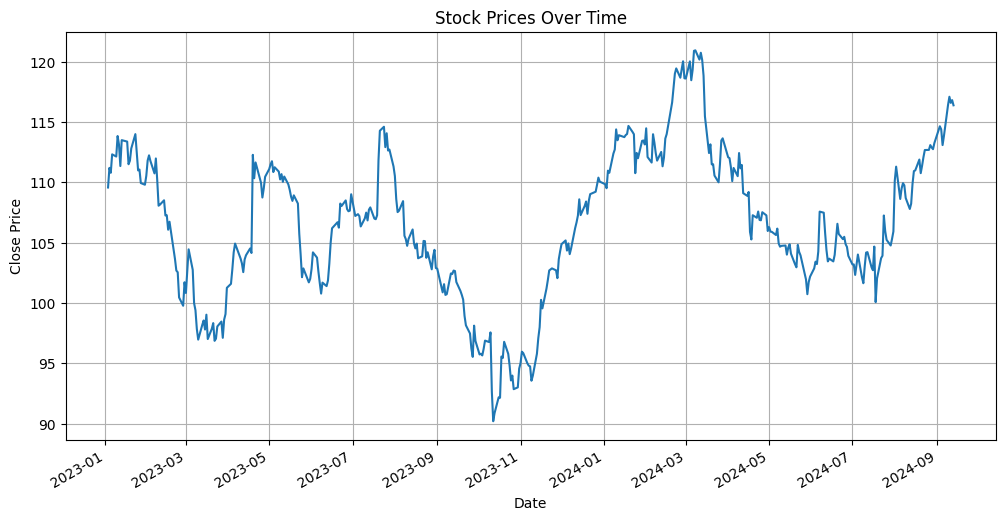

In [34]:
import matplotlib.pyplot as plt

stock_data['Close'].plot(figsize=(12, 6))
plt.title('Stock Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.grid(True)
plt.show()


In [35]:
# Forward filling in the missing values in the dataset with the most recent observation
stock_data.fillna(method='ffill', inplace=True)

# Adding new columns to the dataset
stock_data['Moving_Avg_50'] = stock_data['Close'].rolling(window=50).mean()
stock_data['Moving_Avg_200'] = stock_data['Close'].rolling(window=200).mean()
stock_data['Daily_Return'] = stock_data['Close'].pct_change() #Shows us daily performance of our stock

# Making sure there are no NA values
stock_data.dropna(inplace=True)
stock_data



<ipython-input-35-285a297c7a7a>:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  stock_data.fillna(method='ffill', inplace=True)


,Open,High,Low,Close,Adj Close,Volume,Moving_Avg_50,Moving_Avg_200,Daily_Return
Date,,,,,,,,,
2023-10-18,96.000000,96.500000,91.650002,95.559998,94.131859,16482600,100.1128,105.00000,0.037117
2023-10-19,96.540001,96.540001,93.760002,95.440002,94.013657,8537800,99.9156,104.92930,-0.001256
2023-10-20,95.250000,98.150002,95.250000,96.779999,95.333626,11516600,99.7564,104.85715,0.014040
2023-10-23,96.879997,98.150002,95.660004,95.779999,94.348579,6178800,99.5658,104.78205,-0.010333
2023-10-24,95.400002,95.830002,94.339996,94.809998,93.393066,6677000,99.3400,104.69445,-0.010127
...,...,...,...,...,...,...,...,...,...
2024-09-09,114.459999,116.730003,114.320000,116.430000,116.430000,5101000,107.9672,109.15950,0.022572
2024-09-10,116.150002,117.250000,115.430000,117.110001,117.110001,4963700,108.2312,109.23550,0.005840
2024-09-11,116.389999,116.720001,114.720001,116.599998,116.599998,6535600,108.4992,109.30500,-0.004355


In [36]:
# Prepare the training and testing data for the model
features = stock_data[['Moving_Avg_50', 'Moving_Avg_200', 'Daily_Return']] #Independent Variables
target = stock_data['Close'] #Dependent Variable
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=50) #X_train(training features), X_test(testing features), y_train(training target), y_test(testing target)

# Lets see the shapes of the training and testing sets
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


(182, 3) (46, 3) (182,) (46,)


In [37]:
# Initializing and training the machine learning model, the model learns patterns in the training data that it can use to make prediction
model = RandomForestRegressor(n_estimators=100, random_state=25)
model.fit(X_train, y_train)
# Making predictions
predictions = model.predict(X_test)
predictions


array([112.85210007, 113.20449966, 119.73160141, 107.09359932,
       104.37009903, 113.869599  , 103.02020134,  96.64780151,
       110.70380005, 105.49089867, 110.75019806, 102.47750145,
       104.64560036,  93.82729973, 120.08490158,  99.3239019 ,
       109.36960075, 100.14169945, 108.56740219, 113.11049957,
       119.11480057, 103.15240005,  94.81410248, 102.91770042,
       105.35930038, 106.12240013, 105.41939934, 104.72720016,
       110.86899948, 102.21950134, 105.13210091, 109.32009933,
       103.33290092, 104.09129936, 110.1735994 , 119.90860191,
       113.66529907, 103.87770042,  94.77010208, 107.51299957,
       114.19210014,  94.90710136, 103.25700111, 112.57339783,
       105.9437999 , 116.47010048])

Mean Squared Error: 1.3499878534459826
R-squared: 0.9728283542429845


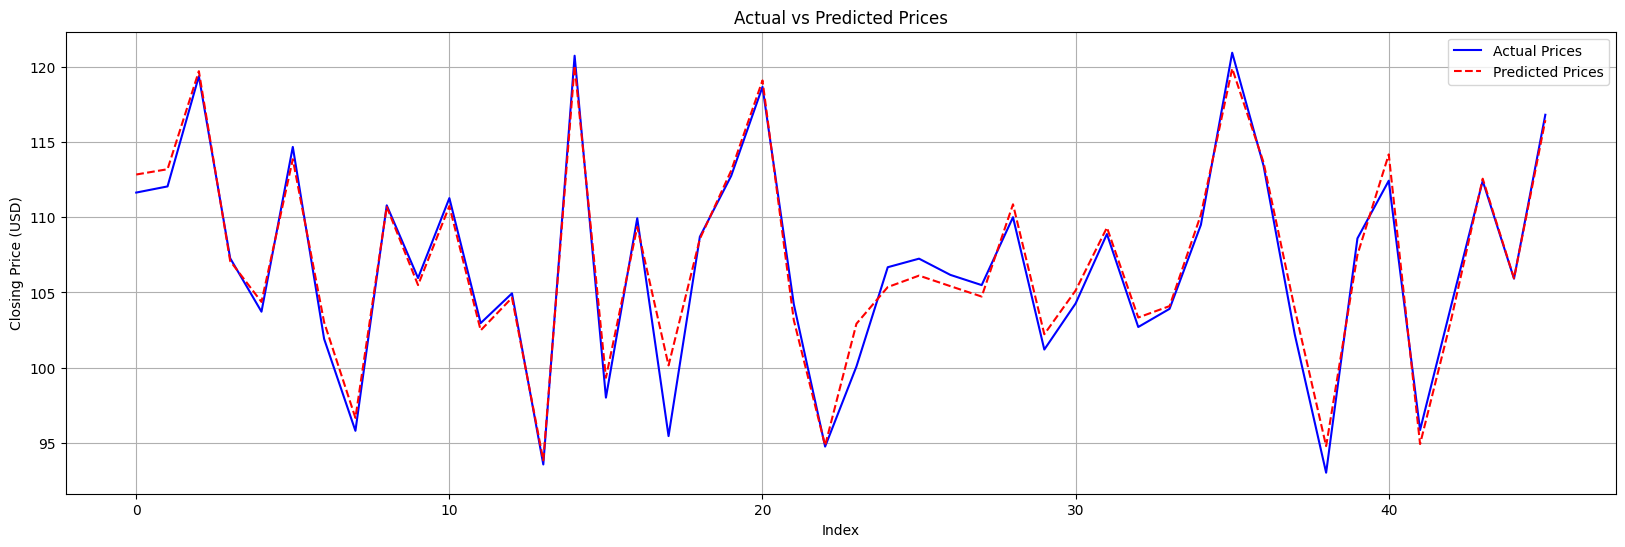

In [38]:
# Calculating and printing the metrics to better visualize our findings
mse = mean_squared_error(y_test, predictions) #Smaller the better
r2 = r2_score(y_test, predictions) #Closer to 1 the better

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

# Lets try to plot the actual vs predicted values
plt.figure(figsize=(20, 6))
plt.plot(y_test.values, label='Actual Prices', color='blue')
plt.plot(predictions, label='Predicted Prices', color='red', linestyle='--')
plt.legend()
plt.title('Actual vs Predicted Prices')
plt.xlabel("Index")
plt.ylabel('Closing Price (USD)')
plt.grid(True)
plt.show()

**Concluding statements** : I got a R-squared value of .9728 which means that over 97% of the variance in historical stock prices was explained by my model.
Also I had a fairly low value of MSE (1.35) which means that there was not much error between my predicted and actual values of stock prices for Abbott Laboratories.